First 5 rows of the dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Summary statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.7

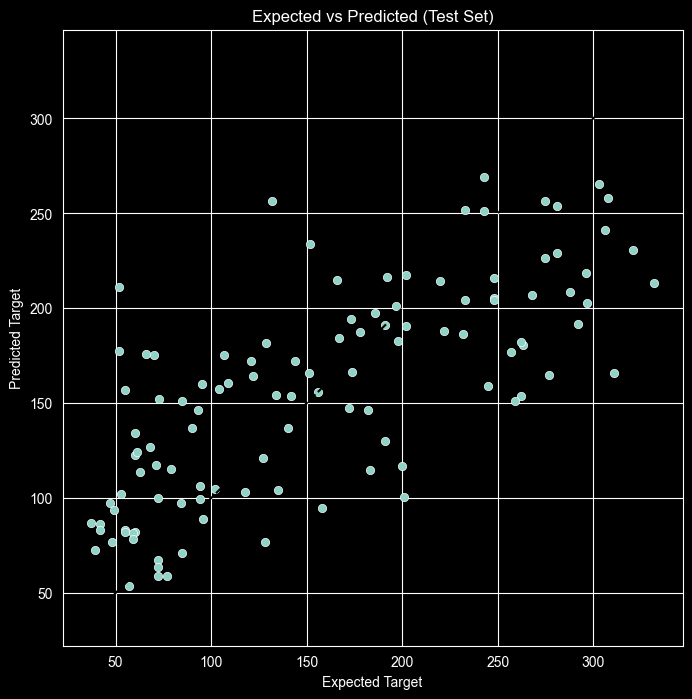


R² score: 0.5322429620529407
Mean Squared Error: 3458.2307025173577


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

df = pd.DataFrame(X, columns=diabetes.feature_names)
df['Target'] = y

print("First 5 rows of the dataset:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

print("\nTrain set shape:", X_train.shape)
print("Test  set shape:", X_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

print("\nIntercept:", model.intercept_)
print("\nCoefficients:")
for name, coef in zip(diabetes.feature_names, model.coef_):
    print(f"{name:>8}: {coef:.4f}")

y_pred = model.predict(X_test)

print("\nFirst 5 predicted values:", y_pred[:5])
print("First 5 actual values   :", y_test[:5])

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')  # perfect prediction line
plt.xlabel("Expected Target")
plt.ylabel("Predicted Target")
plt.title("Expected vs Predicted (Test Set)")
plt.show()

r2 = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

print("\nR² score:", r2)
print("Mean Squared Error:", mse)